In [2]:

import pandas as pd
from glob import glob
import missingno as msno


## Data Pre-Processing
The data behind the Airbnb site is sourced from publicly available information from the Airbnb site.

The data has been analyzed, cleansed and scraped form 15 January 2019 to 12 January 2020.

Get the DATAIf you would like to do further analysis or produce alternate visualisations of the data, it is available below under a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license.

I download 12 csv files from 15 January 2019 to 12 January 2020 and will get it merge into one file in assending order. 


In [3]:


# Use glob to sort the list in assending
stock_files = sorted(glob('*.csv'))

# Concat all the separate CSV files into one dataframe
listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)



<ipython-input-3-850eae53b8a0>:5: DtypeWarning: Columns (43) have mixed types.Specify dtype option on import or set low_memory=False.
  listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)
<ipython-input-3-850eae53b8a0>:5: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)
<ipython-input-3-850eae53b8a0>:5: DtypeWarning: Columns (43,61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  listing = pd.concat((pd.read_csv(file).assign(filename=file) for file in stock_files), ignore_index=True)


In [32]:
listing.head(4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,filename
0,1078,https://www.airbnb.com/rooms/1078,20190114203221,2019-01-15,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,The garage apartment was built in the 1920s an...,This upstairs apartment is surrounded by trees...,none,"Hyde Park is close to downtown, UT, 6th street...",...,f,flexible,f,f,3,3,0,0,1.65,a.csv
1,2265,https://www.airbnb.com/rooms/2265,20190114203221,2019-01-14,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.19,a.csv
2,5245,https://www.airbnb.com/rooms/5245,20190114203221,2019-01-14,"Green, Colorful, Clean & Cozy home",NaN,Situated in a vibrant & diverse multicultural ...,Situated in a vibrant & diverse multicultural ...,none,NaN,...,f,strict_14_with_grace_period,f,f,3,2,1,0,0.08,a.csv
3,5456,https://www.airbnb.com/rooms/5456,20190114203221,2019-01-14,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,f,strict_14_with_grace_period,f,t,1,1,0,0,3.88,a.csv


In [5]:
listing.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                                5
                                                ...  
calculated_host_listings_count_entire_homes         0
calculated_host_listings_count_private_rooms        0
calculated_host_listings_count_shared_rooms         0
reviews_per_month                               32812
filename                                            0
Length: 107, dtype: int64

In [44]:
listing.info('*')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150614 entries, 0 to 150613
Data columns (total 107 columns):
 #    Column                                        Dtype         
---   ------                                        -----         
 0    id                                            int64         
 1    listing_url                                   object        
 2    scrape_id                                     int64         
 3    last_scraped                                  datetime64[ns]
 4    name                                          object        
 5    summary                                       object        
 6    space                                         object        
 7    description                                   object        
 8    experiences_offered                           object        
 9    neighborhood_overview                         object        
 10   notes                                         object        
 11   transit    

In [22]:
# Convert to datetime
listing['last_scraped'] = pd.to_datetime(listing['last_scraped'])
listing['host_since'] = pd.to_datetime(listing['host_since'])
listing['first_review'] = pd.to_datetime(listing['first_review'])
listing['last_review'] = pd.to_datetime(listing['last_review'])

In [30]:
#convert percentages to numeric from range 0 to 1
listing['host_response_rate'] = pd.to_numeric(listing['host_response_rate'].apply(lambda x: str(x)
                                                                                              .replace('%', '')
                                                                                              .replace('N/A', '')),
                                                    errors='coerce')/100

listing['host_acceptance_rate'] = pd.to_numeric(listing['host_acceptance_rate'].apply(lambda x: str(x)
                                                                                              .replace('%', '')
                                                                                              .replace('N/A', '')),
                                                    errors='coerce')/100

In [33]:
# convert currency to numeric
listing['price'] = pd.to_numeric(listing['price'].apply(lambda x: str(x)
                                                                    .replace('$', '')
                                                                    .replace(',', '')),
                                                    errors='coerce')


listing['weekly_price'] = pd.to_numeric(listing['weekly_price'].apply(lambda x: str(x)
                                                                    .replace('$', '')
                                                                    .replace(',', '')),
                                                    errors='coerce')


listing['monthly_price'] = pd.to_numeric(listing['monthly_price'].apply(lambda x: str(x)
                                                                    .replace('$', '')
                                                                    .replace(',', '')),
                                                    errors='coerce')

listing['security_deposit'] = pd.to_numeric(listing['security_deposit'].apply(lambda x: str(x)
                                                                    .replace('$', '')
                                                                    .replace(',', '')),
                                                    errors='coerce')

listing['cleaning_fee'] = pd.to_numeric(listing['cleaning_fee'].apply(lambda x: str(x)
                                                                    .replace('$', '')
                                                                    .replace(',', '')),
                                                    errors='coerce')

listing['extra_people'] = pd.to_numeric(listing['extra_people'].apply(lambda x: str(x)
                                                                    .replace('$', '')
                                                                    .replace(',', '')),
                                                    errors='coerce')

In [35]:
# normalize review score to fit to value between 0 to 1
listing['review_scores_rating'] = pd.to_numeric(listing['review_scores_rating'], errors='coerce')/100
listing['review_scores_accuracy'] = pd.to_numeric(listing['review_scores_accuracy'], errors='coerce')/10
listing['review_scores_cleanliness'] = pd.to_numeric(listing['review_scores_cleanliness'], errors='coerce')/10
listing['review_scores_checkin'] = pd.to_numeric(listing['review_scores_checkin'], errors='coerce')/10
listing['review_scores_communication'] = pd.to_numeric(listing['review_scores_communication'], errors='coerce')/10
listing['review_scores_location'] = pd.to_numeric(listing['review_scores_location'], errors='coerce')/10
listing['review_scores_value'] = pd.to_numeric(listing['review_scores_value'], errors='coerce')/10

In [46]:
# convert true/false to codes
cleanup_colval = {
    'host_is_superhost' : {'f':0, 't':1},
    'host_identity_verified': {'f':0, 't':1},
    'is_location_exact': {'f':0, 't':1},
    'instant_bookable': {'f':0, 't':1},
    'require_guest_profile_picture': {'f':0, 't':1},
    'require_guest_phone_verification': {'f':0, 't':1},
    'host_has_profile_pic': {'f':0, 't':1},
    'is_business_travel_ready': {'f':0, 't':1}
}

listing.replace(cleanup_colval, inplace=True)

In [47]:
listing.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,filename
0,1078,https://www.airbnb.com/rooms/1078,20190114203221,2019-01-15,*UT/Hyde Park Craftsman Apartment,This upstairs apartment is surrounded by trees...,The garage apartment was built in the 1920s an...,This upstairs apartment is surrounded by trees...,none,"Hyde Park is close to downtown, UT, 6th street...",...,0,flexible,0,0,3,3,0,0,1.65,a.csv
1,2265,https://www.airbnb.com/rooms/2265,20190114203221,2019-01-14,Zen-East in the Heart of Austin,Zen East is situated in a vibrant & diverse mu...,This colorful and clean 1923 house was complet...,Zen East is situated in a vibrant & diverse mu...,none,NaN,...,0,strict_14_with_grace_period,0,0,3,2,1,0,0.19,a.csv
2,5245,https://www.airbnb.com/rooms/5245,20190114203221,2019-01-14,"Green, Colorful, Clean & Cozy home",NaN,Situated in a vibrant & diverse multicultural ...,Situated in a vibrant & diverse multicultural ...,none,NaN,...,0,strict_14_with_grace_period,0,0,3,2,1,0,0.08,a.csv
3,5456,https://www.airbnb.com/rooms/5456,20190114203221,2019-01-14,"Walk to 6th, Rainey St and Convention Ctr",Fabulous location for walking to Convention Ce...,Cute Private Studio apartment located in Willo...,Fabulous location for walking to Convention Ce...,none,My neighborhood is ideally located if you want...,...,0,strict_14_with_grace_period,0,1,1,1,0,0,3.88,a.csv
4,5769,https://www.airbnb.com/rooms/5769,20190114203221,2019-01-15,NW Austin Room,NaN,Looking for a comfortable inexpensive room to ...,Looking for a comfortable inexpensive room to ...,none,Quiet neighborhood with lots of trees and good...,...,0,moderate,1,1,1,0,1,0,2.23,a.csv


<AxesSubplot:>

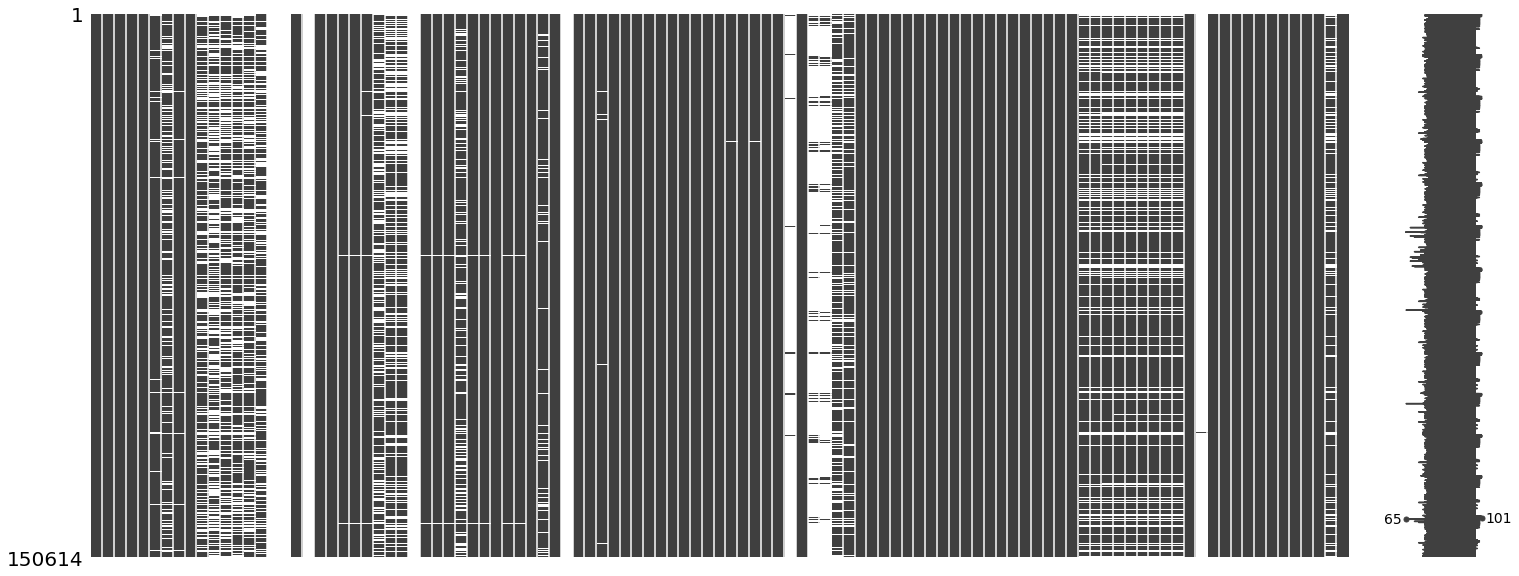

In [51]:
# Checking for missing values and any correlation between them
# Using this matrix you can very quickly find the pattern of missingness in the dataset.

msno.matrix(listing)


ValueError: The number of FixedLocator locations (0), usually from a call to set_ticks, does not match the number of ticklabels (107).

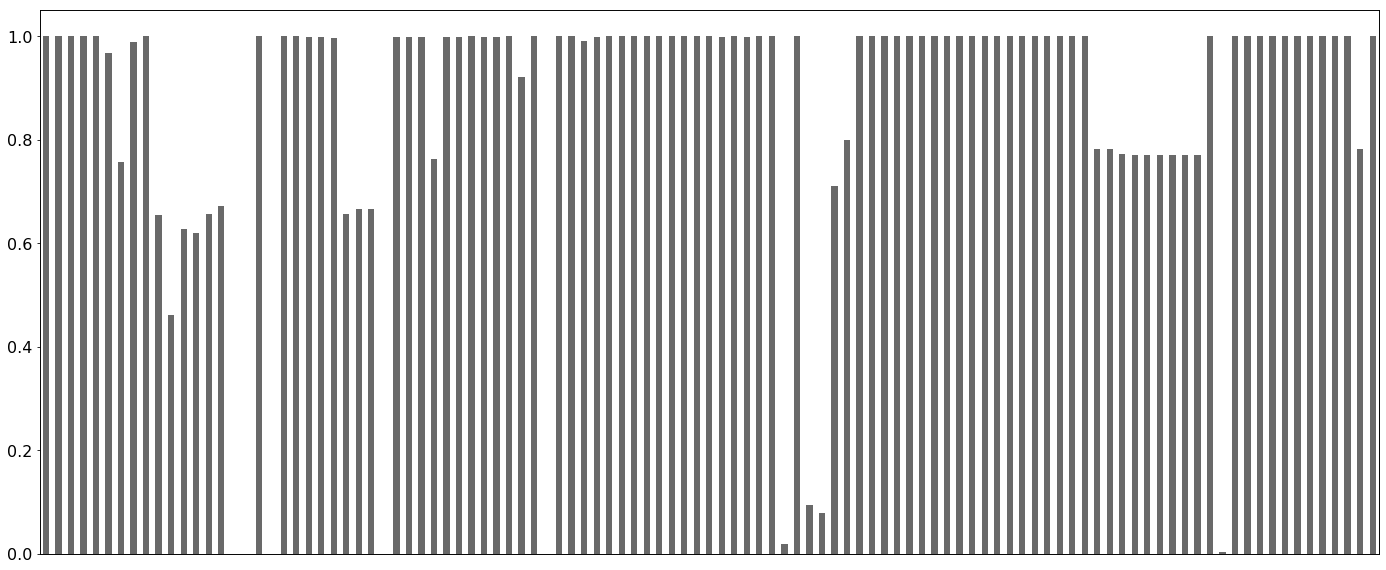

In [49]:
msno.bar(listing)

<AxesSubplot:>

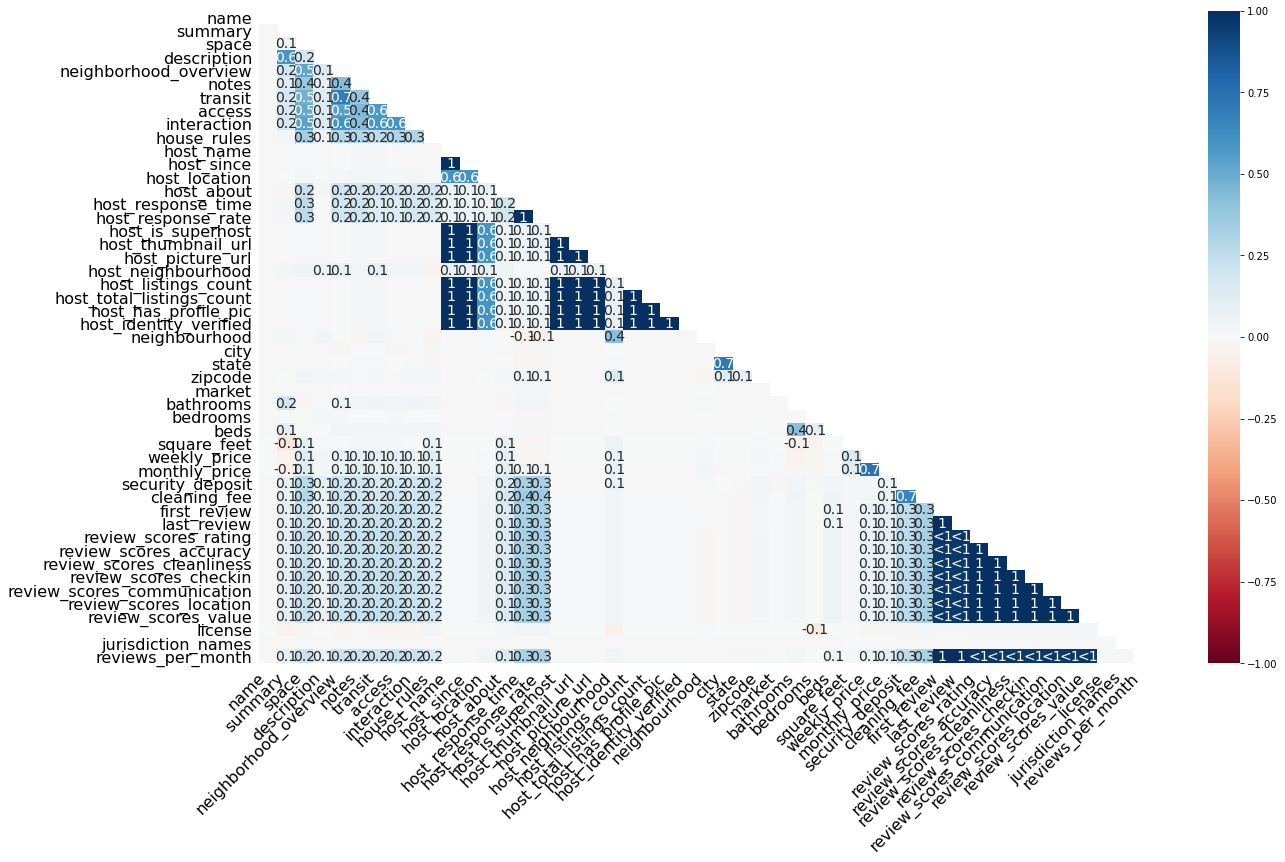

In [52]:
msno.heatmap(listing)